In [1]:
import requests
from bs4 import BeautifulSoup 
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
phone_reviews = []

In [3]:
for i in range(1,21):
  ip=[]  
  url="https://www.amazon.in/New-Apple-iPhone-12-128GB/product-reviews/B08L5TNJHG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
  response = requests.get(url)
  soup = BeautifulSoup(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.find_all("span",attrs={"class","a-size-base review-text review-text-content"})# Extracting the content under specific tags
  for i in range(len(reviews)):
    ip.append(reviews[i].text) 
  phone_reviews = phone_reviews+ip  # adding the reviews of one page to empty list which in future contains all the reviews

In [4]:
print(phone_reviews)

['\n\n  Sold kidney bought this, now not feeling well but the number of days I am alive with one kidney will enjoy using this phone. Guys be careful if you rich it’s ok else sell something else but not kidney it hurts\n\n', '\n\n  Worst battery performance.Iphone 11 is far better den this..In 4 hour battery will come down from 100 to 15 percent.Please dont buy this product at this price.\n\n', '\n\n\n\n\n                    The media could not be loaded.\n                \n\n\n\n\n  \xa0Another beauty from Apple. I was upgraded from iPhone X and it was great experience with all the latest specs and flawlessly smooth. Thanks to all new A14 Bionic chip.Build quality was great as always from Apple.Phone feels light on hands due to aluminium body. I chose Blue colour because wanted to go for different colour than routine Black and white iPhones so initially I was bit skeptical but after seeing the phone in person I’m happy with the blue colour  “ not bad at all and not too flashy”Grip and 

In [5]:
# writng reviews in a text file 
with open("apple.txt","w",encoding='utf-8') as output:
    output.write(str(phone_reviews))

In [6]:
rev_string = " ".join(phone_reviews)

In [7]:
rev_string

'\n\n  Sold kidney bought this, now not feeling well but the number of days I am alive with one kidney will enjoy using this phone. Guys be careful if you rich it’s ok else sell something else but not kidney it hurts\n\n \n\n  Worst battery performance.Iphone 11 is far better den this..In 4 hour battery will come down from 100 to 15 percent.Please dont buy this product at this price.\n\n \n\n\n\n\n                    The media could not be loaded.\n                \n\n\n\n\n  \xa0Another beauty from Apple. I was upgraded from iPhone X and it was great experience with all the latest specs and flawlessly smooth. Thanks to all new A14 Bionic chip.Build quality was great as always from Apple.Phone feels light on hands due to aluminium body. I chose Blue colour because wanted to go for different colour than routine Black and white iPhones so initially I was bit skeptical but after seeing the phone in person I’m happy with the blue colour  “ not bad at all and not too flashy”Grip and feel pe

In [8]:
def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+"," ",i).lower() 
    w = []
    for word in i.split(" "):
        if len(word)>2:
            w.append(word)
    return (" ".join(w))

In [9]:
clean_rev_string = cleaning_text(rev_string)

In [10]:
clean_rev_string

'sold kidney bought this now not feeling well but the number days alive with one kidney will enjoy using this phone guys careful you rich else sell something else but not kidney hurts worst battery performance iphone far better den this hour battery will come down from percent please dont buy this product this price the media could not loaded another beauty from apple was upgraded from iphone and was great experience with all the latest specs and flawlessly smooth thanks all new bionic chip build quality was great always from apple phone feels light hands due aluminium body chose blue colour because wanted for different colour than routine black and white iphones initially was bit skeptical but after seeing the phone person happy with the blue colour not bad all and not too flashy grip and feel perfect phone comes with ios camera quality was excellent and sufficient normal user you are from ios ecosystem nothing will wrong here there nothing question about the quality and interface fro

In [11]:
reviews_words = clean_rev_string.split(" ")

In [12]:
# Custom Stopwords
with open("stopwords_en.txt","r") as sw:
    stop_words = sw.read()

In [13]:
stop_words = stop_words.split("\n")

In [14]:
stop_words

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [15]:
stop_words.extend(["iphone","mobile","time","ios",
                   "phone","device","screen","battery","product",
                   "day","price", "phone", "apple"])

In [16]:
rev_words = [w for w in reviews_words if not w in stop_words]

In [17]:
rev_words

['sold',
 'kidney',
 'bought',
 'feeling',
 'number',
 'days',
 'alive',
 'kidney',
 'enjoy',
 'guys',
 'careful',
 'rich',
 'sell',
 'kidney',
 'hurts',
 'worst',
 'performance',
 'den',
 'hour',
 'percent',
 'dont',
 'buy',
 'media',
 'loaded',
 'beauty',
 'upgraded',
 'great',
 'experience',
 'latest',
 'specs',
 'flawlessly',
 'smooth',
 'bionic',
 'chip',
 'build',
 'quality',
 'great',
 'feels',
 'light',
 'hands',
 'due',
 'aluminium',
 'body',
 'chose',
 'blue',
 'colour',
 'wanted',
 'colour',
 'routine',
 'black',
 'white',
 'iphones',
 'initially',
 'bit',
 'skeptical',
 'person',
 'happy',
 'blue',
 'colour',
 'bad',
 'flashy',
 'grip',
 'feel',
 'perfect',
 'camera',
 'quality',
 'excellent',
 'sufficient',
 'normal',
 'user',
 'ecosystem',
 'wrong',
 'question',
 'quality',
 'interface',
 'personal',
 'opinion',
 'long',
 'user',
 'won',
 'earphones',
 'charging',
 'brick',
 'adapter',
 'bought',
 'separately',
 'adapter',
 'india',
 'online',
 'store',
 'don',
 'judge',


In [19]:
vectorizer = TfidfVectorizer(rev_words, use_idf = True,
                             ngram_range=(1, 2))
X = vectorizer.fit_transform(rev_words)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=['sold', 'kidney', 'bought', 'feeling', 'number', 'days', 'alive', 'kidney', 'enjoy', 'guys', 'careful', 'rich', 'sell', 'kidney', 'hurts', 'worst', 'performance', 'den', 'hour', 'percent', 'dont', 'buy', 'media', 'loaded', 'beauty', 'upgraded', 'great', 'experience', 'latest', 'specs', 'flawlessly', 'smooth', 'bionic', 'chip', 'build', 'quality', 'great', 'feels', 'light', 'hands', 'due', 'aluminium', 'body', 'chose', 'blue', 'colour', 'wanted', 'colour', 'routine', 'black', 'white', 'iphones', 'initially', 'bit', 'skeptical', 'person', 'happy', 'blue', 'colour', 'bad', 'flashy', 'grip', 'feel', 'perfect', 'camera', 'quality', 'excellent', 'sufficient', 'normal', 'user', 'ecosystem', 'wrong', 'question', 'quality', 'interface', 'personal', 'opinion', 'long', 'user', 'won', 'earphones', 'charging', 'brick', 'adapter', 'bought', 'separately', 'adapter', 'india', 'online', 'store', 'don',

In [20]:
# Joinining all the reviews into single paragraph 
rev_string = " ".join(rev_words)

In [21]:
rev_string

'sold kidney bought feeling number days alive kidney enjoy guys careful rich sell kidney hurts worst performance den hour percent dont buy media loaded beauty upgraded great experience latest specs flawlessly smooth bionic chip build quality great feels light hands due aluminium body chose blue colour wanted colour routine black white iphones initially bit skeptical person happy blue colour bad flashy grip feel perfect camera quality excellent sufficient normal user ecosystem wrong question quality interface personal opinion long user won earphones charging brick adapter bought separately adapter india online store don judge accessories removal tag hope justify hope wanted badly made india iphones enjoy lower priced priced iphones future big appario retail pvt amazon delivering genuine perfect condition delivered promised date update testing days life results amazing completely satisfied performance moderate gaming moderate video content heavy calls heavy browsing life sufficient regul

In [22]:
# Define a function to plot word cloud
def plot_cloud(wordcloud): 
    plt.figure(figsize=(40, 30)) 
    plt.imshow(wordcloud) 
    plt.axis("off")

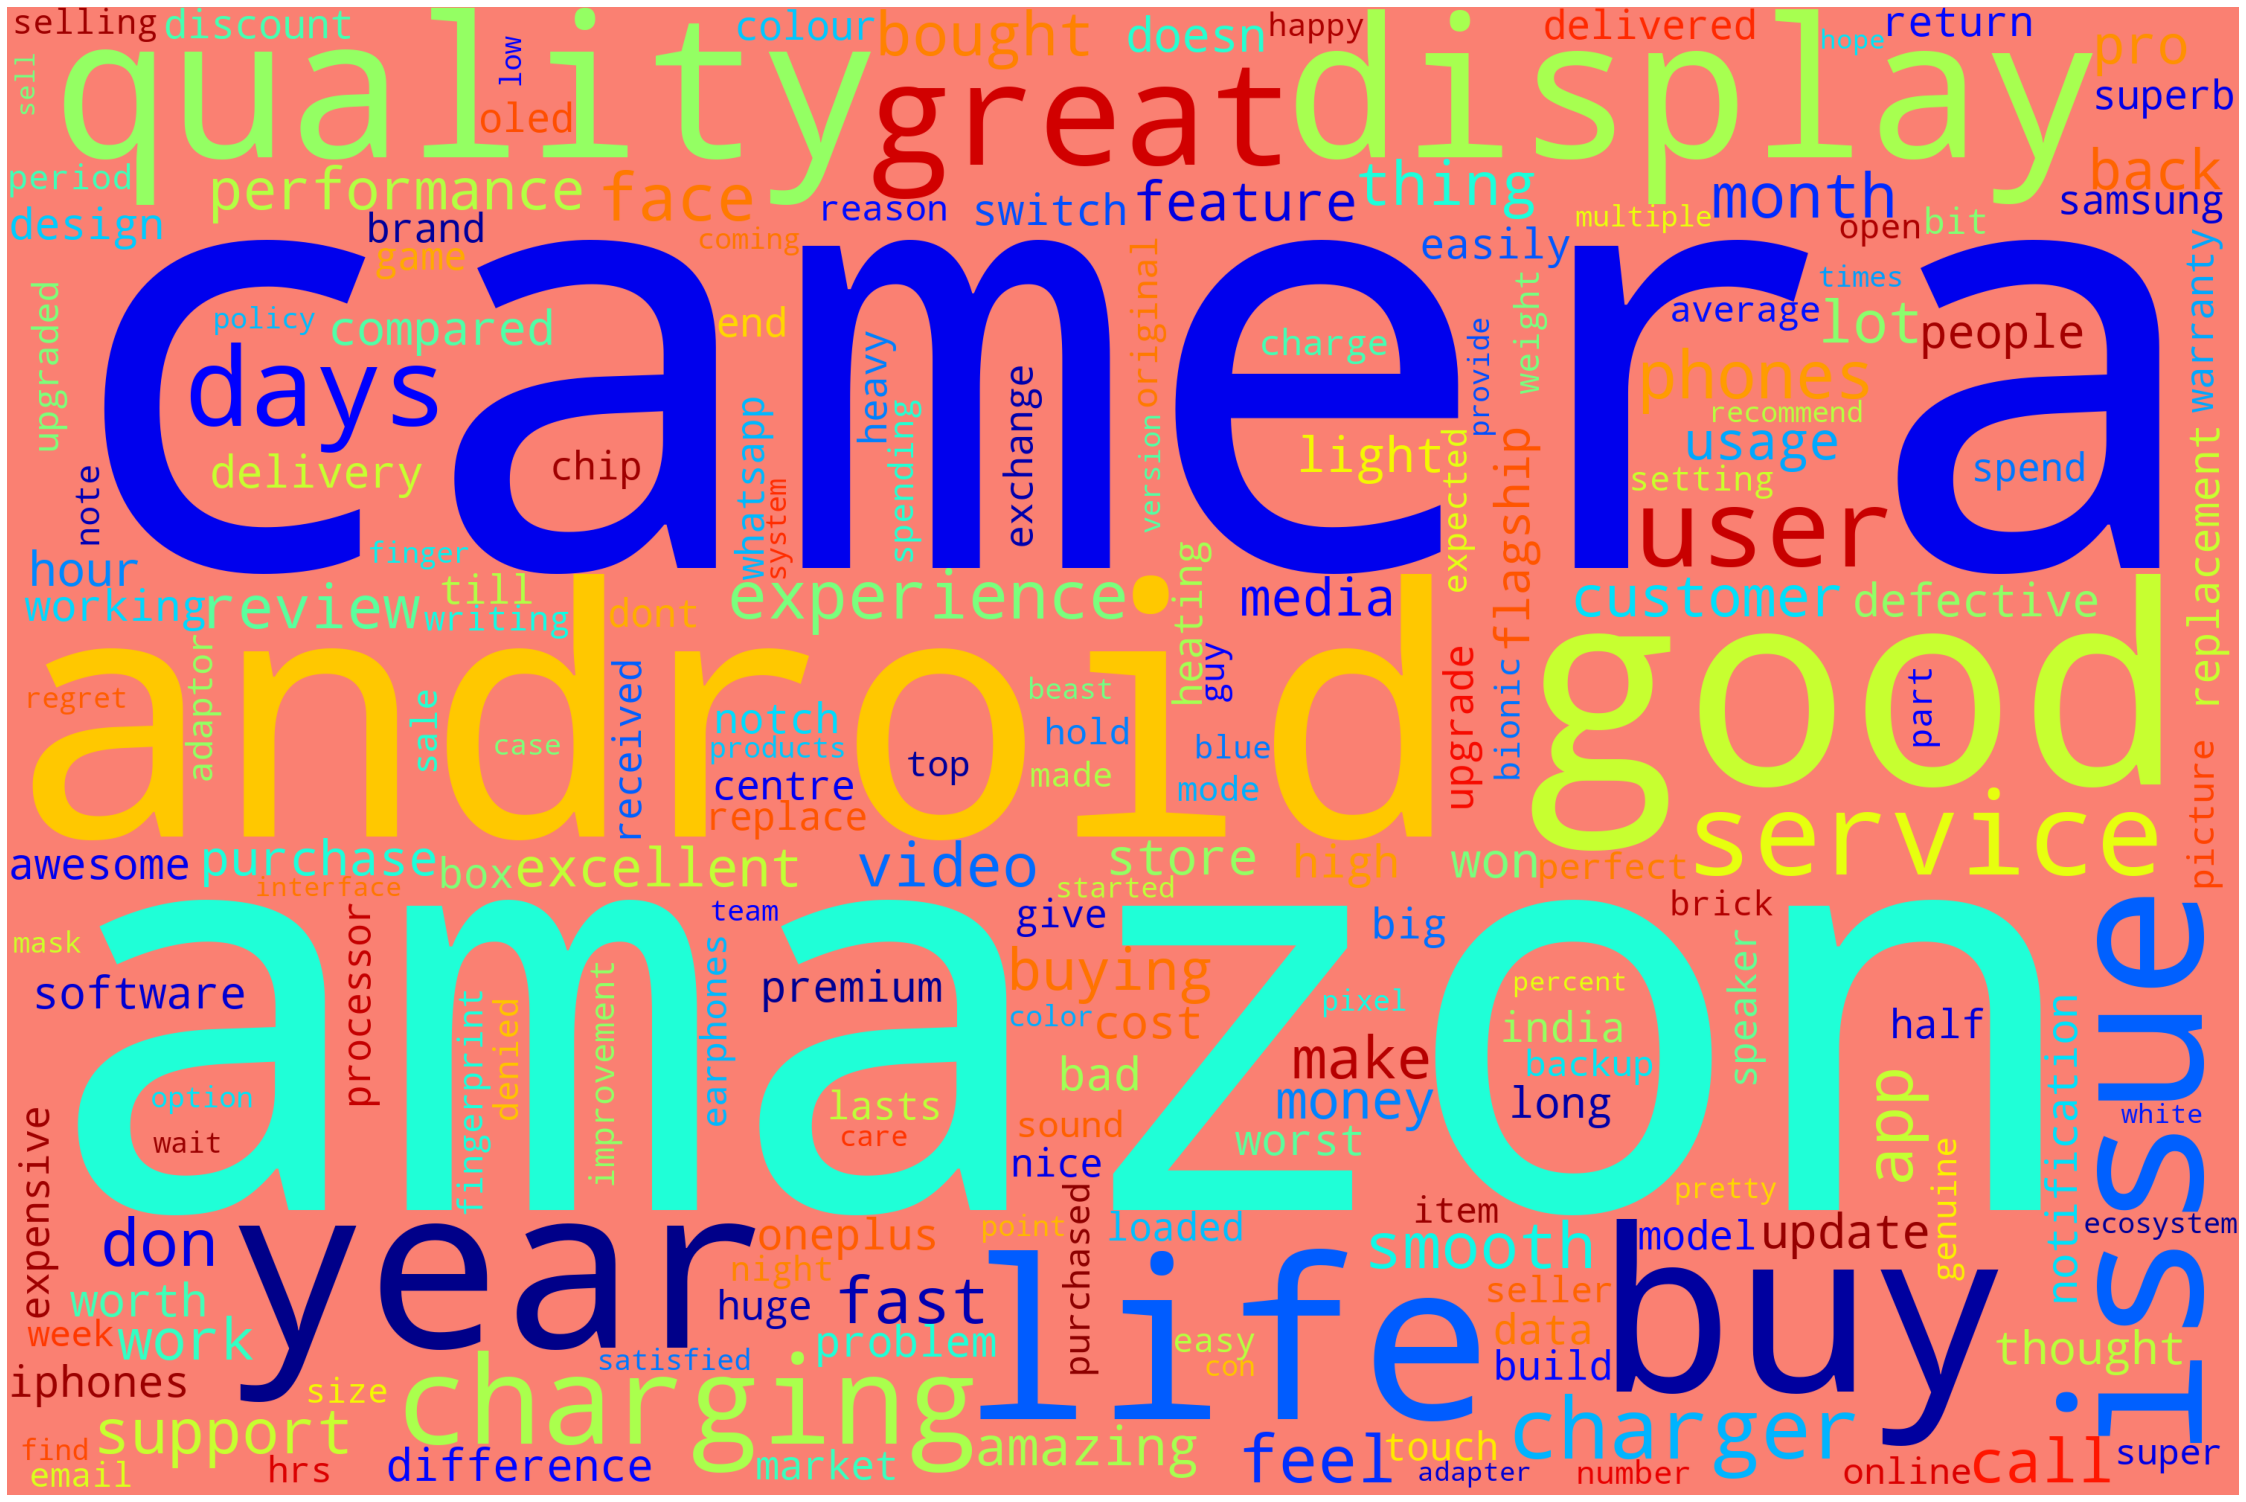

In [23]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon',
                      colormap='jet', collocations=False, stopwords = STOPWORDS).generate(rev_string) 
plot_cloud(wordcloud)

In [24]:
with open("positive-words.txt") as pos:
    poswords = pos.read().split("\n")

In [25]:
# Choosing the only words which are present in positive words
positive_word = " ".join ([w for w in rev_words if w in poswords])

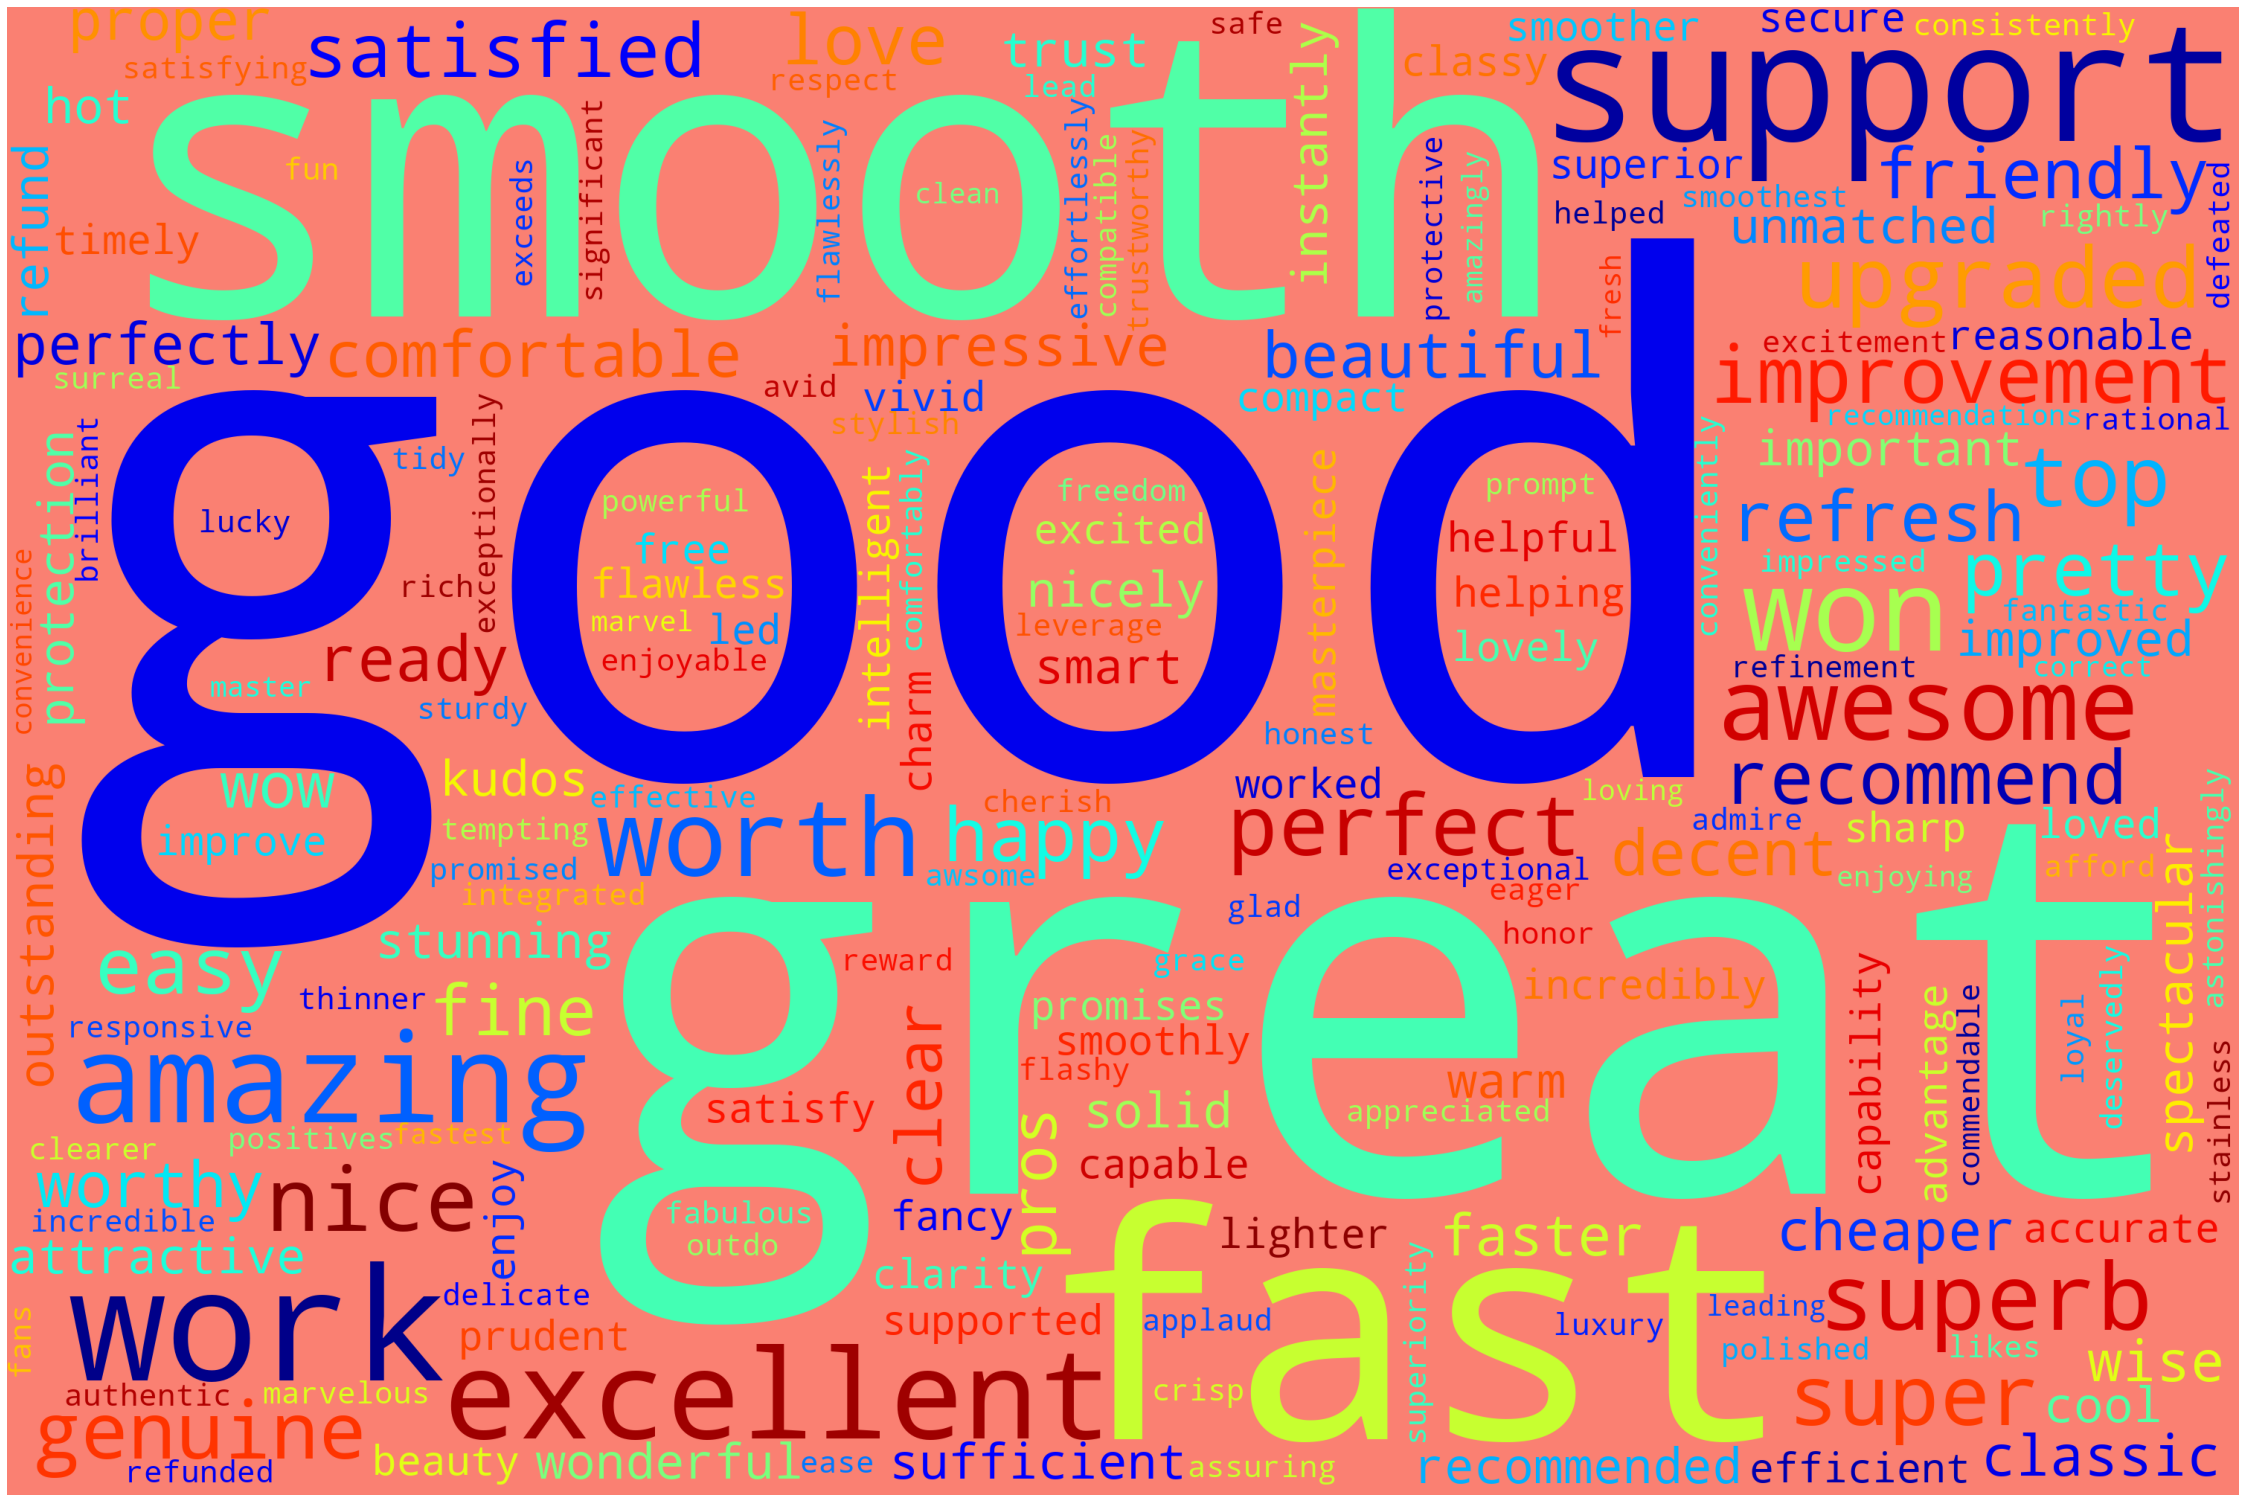

In [26]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon',
                      colormap='jet', collocations=False, stopwords = STOPWORDS).generate(positive_word) 
plot_cloud(wordcloud)

In [28]:
with open("negative-words.txt") as neg:
    negwords = neg.read().split("\n")

In [29]:
# Choosing the only words which are present in negwords
negative_word = " ".join ([w for w in rev_words if w in negwords])

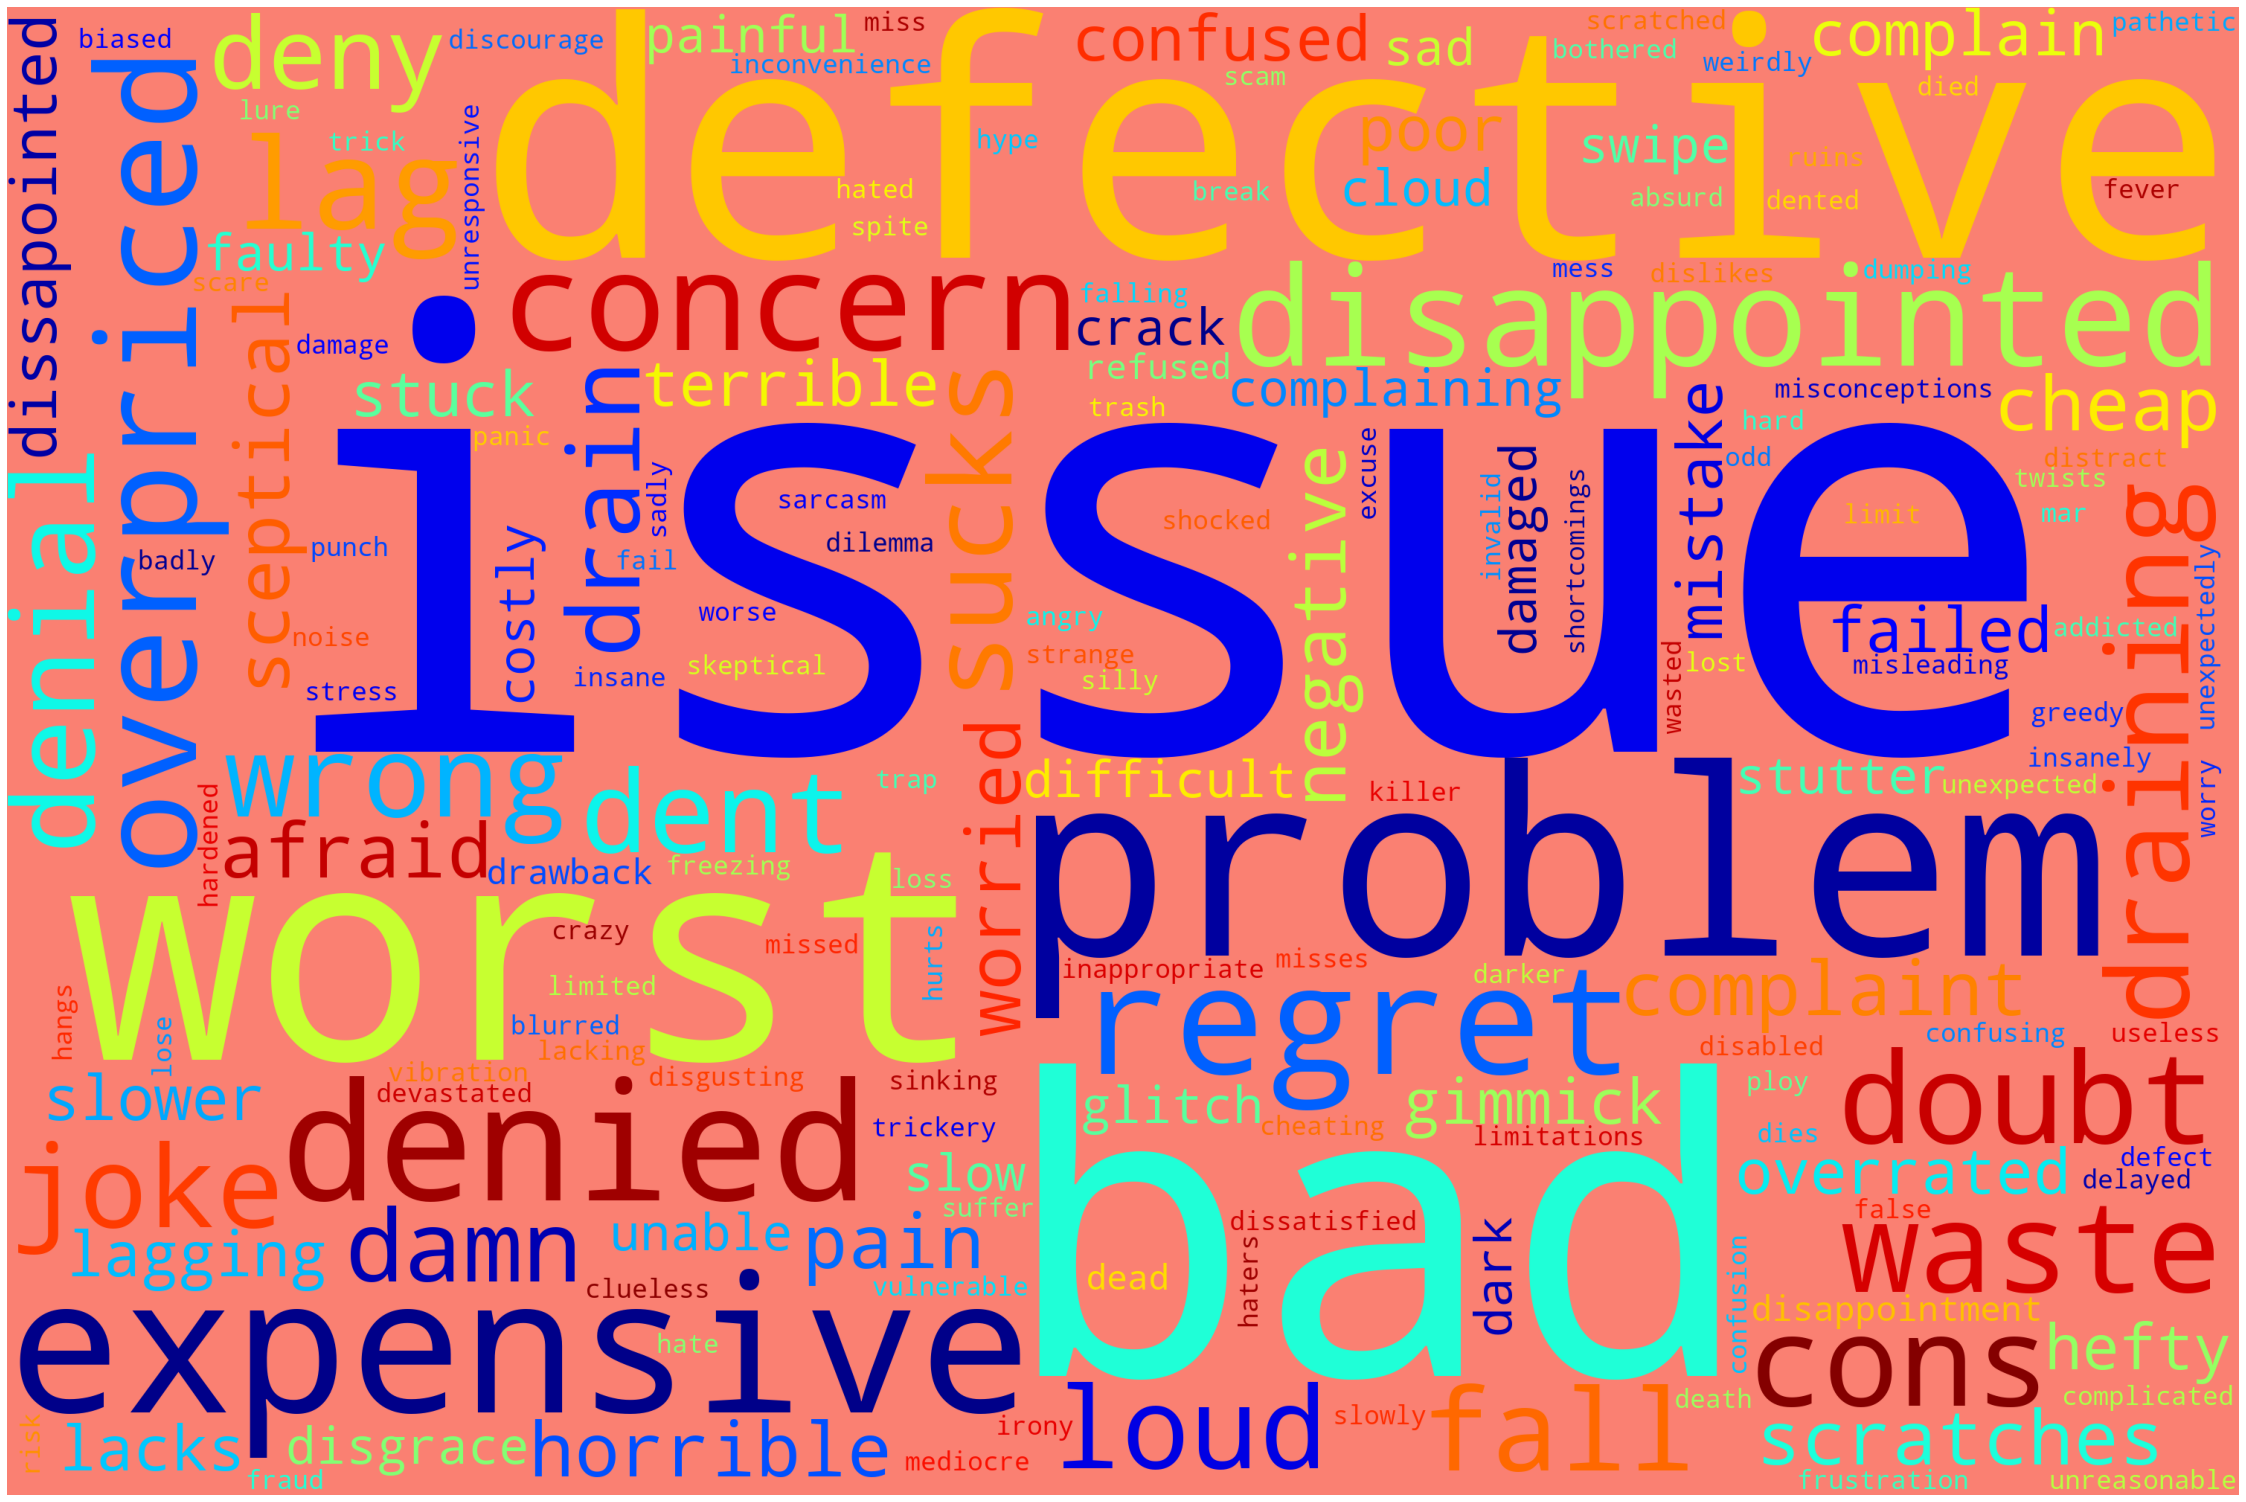

In [30]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon',
                      colormap='jet', collocations=False, stopwords = STOPWORDS).generate(negative_word) 
plot_cloud(wordcloud)

In [31]:
WNL = nltk.WordNetLemmatizer()

In [32]:
# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in rev_words]

In [33]:
text_content

['sold',
 'kidney',
 'bought',
 'feeling',
 'number',
 'day',
 'alive',
 'kidney',
 'enjoy',
 'guy',
 'careful',
 'rich',
 'sell',
 'kidney',
 'hurt',
 'worst',
 'performance',
 'den',
 'hour',
 'percent',
 'dont',
 'buy',
 'medium',
 'loaded',
 'beauty',
 'upgraded',
 'great',
 'experience',
 'latest',
 'spec',
 'flawlessly',
 'smooth',
 'bionic',
 'chip',
 'build',
 'quality',
 'great',
 'feel',
 'light',
 'hand',
 'due',
 'aluminium',
 'body',
 'chose',
 'blue',
 'colour',
 'wanted',
 'colour',
 'routine',
 'black',
 'white',
 'iphones',
 'initially',
 'bit',
 'skeptical',
 'person',
 'happy',
 'blue',
 'colour',
 'bad',
 'flashy',
 'grip',
 'feel',
 'perfect',
 'camera',
 'quality',
 'excellent',
 'sufficient',
 'normal',
 'user',
 'ecosystem',
 'wrong',
 'question',
 'quality',
 'interface',
 'personal',
 'opinion',
 'long',
 'user',
 'won',
 'earphone',
 'charging',
 'brick',
 'adapter',
 'bought',
 'separately',
 'adapter',
 'india',
 'online',
 'store',
 'don',
 'judge',
 'acce

In [34]:
bigrams_list = list(nltk.bigrams(text_content))
print(bigrams_list)

[('sold', 'kidney'), ('kidney', 'bought'), ('bought', 'feeling'), ('feeling', 'number'), ('number', 'day'), ('day', 'alive'), ('alive', 'kidney'), ('kidney', 'enjoy'), ('enjoy', 'guy'), ('guy', 'careful'), ('careful', 'rich'), ('rich', 'sell'), ('sell', 'kidney'), ('kidney', 'hurt'), ('hurt', 'worst'), ('worst', 'performance'), ('performance', 'den'), ('den', 'hour'), ('hour', 'percent'), ('percent', 'dont'), ('dont', 'buy'), ('buy', 'medium'), ('medium', 'loaded'), ('loaded', 'beauty'), ('beauty', 'upgraded'), ('upgraded', 'great'), ('great', 'experience'), ('experience', 'latest'), ('latest', 'spec'), ('spec', 'flawlessly'), ('flawlessly', 'smooth'), ('smooth', 'bionic'), ('bionic', 'chip'), ('chip', 'build'), ('build', 'quality'), ('quality', 'great'), ('great', 'feel'), ('feel', 'light'), ('light', 'hand'), ('hand', 'due'), ('due', 'aluminium'), ('aluminium', 'body'), ('body', 'chose'), ('chose', 'blue'), ('blue', 'colour'), ('colour', 'wanted'), ('wanted', 'colour'), ('colour', 'r

In [35]:
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

['sold kidney', 'kidney bought', 'bought feeling', 'feeling number', 'number day', 'day alive', 'alive kidney', 'kidney enjoy', 'enjoy guy', 'guy careful', 'careful rich', 'rich sell', 'sell kidney', 'kidney hurt', 'hurt worst', 'worst performance', 'performance den', 'den hour', 'hour percent', 'percent dont', 'dont buy', 'buy medium', 'medium loaded', 'loaded beauty', 'beauty upgraded', 'upgraded great', 'great experience', 'experience latest', 'latest spec', 'spec flawlessly', 'flawlessly smooth', 'smooth bionic', 'bionic chip', 'chip build', 'build quality', 'quality great', 'great feel', 'feel light', 'light hand', 'hand due', 'due aluminium', 'aluminium body', 'body chose', 'chose blue', 'blue colour', 'colour wanted', 'wanted colour', 'colour routine', 'routine black', 'black white', 'white iphones', 'iphones initially', 'initially bit', 'bit skeptical', 'skeptical person', 'person happy', 'happy blue', 'blue colour', 'colour bad', 'bad flashy', 'flashy grip', 'grip feel', 'feel

In [36]:
vectorizer1 = TfidfVectorizer(ngram_range = (2, 2))
bag_of_words = vectorizer1.fit_transform(dictionary2)
vectorizer1.vocabulary_

{'sold kidney': 4602,
 'kidney bought': 2719,
 'bought feeling': 482,
 'feeling number': 1950,
 'number day': 3340,
 'day alive': 1230,
 'alive kidney': 61,
 'kidney enjoy': 2720,
 'enjoy guy': 1676,
 'guy careful': 2286,
 'careful rich': 751,
 'rich sell': 4233,
 'sell kidney': 4347,
 'kidney hurt': 2721,
 'hurt worst': 2478,
 'worst performance': 5453,
 'performance den': 3578,
 'den hour': 1332,
 'hour percent': 2453,
 'percent dont': 3552,
 'dont buy': 1535,
 'buy medium': 587,
 'medium loaded': 3100,
 'loaded beauty': 2895,
 'beauty upgraded': 410,
 'upgraded great': 5153,
 'great experience': 2247,
 'experience latest': 1786,
 'latest spec': 2764,
 'spec flawlessly': 4636,
 'flawlessly smooth': 2017,
 'smooth bionic': 4549,
 'bionic chip': 436,
 'chip build': 897,
 'build quality': 555,
 'quality great': 3944,
 'great feel': 2248,
 'feel light': 1937,
 'light hand': 2859,
 'hand due': 2304,
 'due aluminium': 1575,
 'aluminium body': 64,
 'body chose': 464,
 'chose blue': 912,
 'b

In [37]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer1.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [38]:
print(words_freq[:50])

[('android user', 13.0), ('camera quality', 10.0), ('service centre', 10.0), ('medium loaded', 9.0), ('build quality', 8.0), ('fast charging', 8.0), ('oled display', 7.0), ('customer service', 7.0), ('heating issue', 6.0), ('bionic chip', 5.0), ('return policy', 5.0), ('switch android', 5.0), ('amazon customer', 5.0), ('writing review', 5.0), ('light weight', 5.0), ('social medium', 5.0), ('buy amazon', 5.0), ('camera awesome', 5.0), ('face recognition', 5.0), ('app library', 5.0), ('refresh rate', 5.0), ('finger print', 5.0), ('life good', 5.0), ('blue colour', 4.0), ('charging brick', 4.0), ('camera good', 4.0), ('customer care', 4.0), ('waste money', 4.0), ('android flagship', 4.0), ('android phone', 4.0), ('picture quality', 4.0), ('good life', 4.0), ('user year', 4.0), ('user experience', 4.0), ('face unlock', 4.0), ('good camera', 4.0), ('feel good', 4.0), ('service center', 4.0), ('quality great', 3.0), ('quality excellent', 3.0), ('online store', 3.0), ('won work', 3.0), ('disp

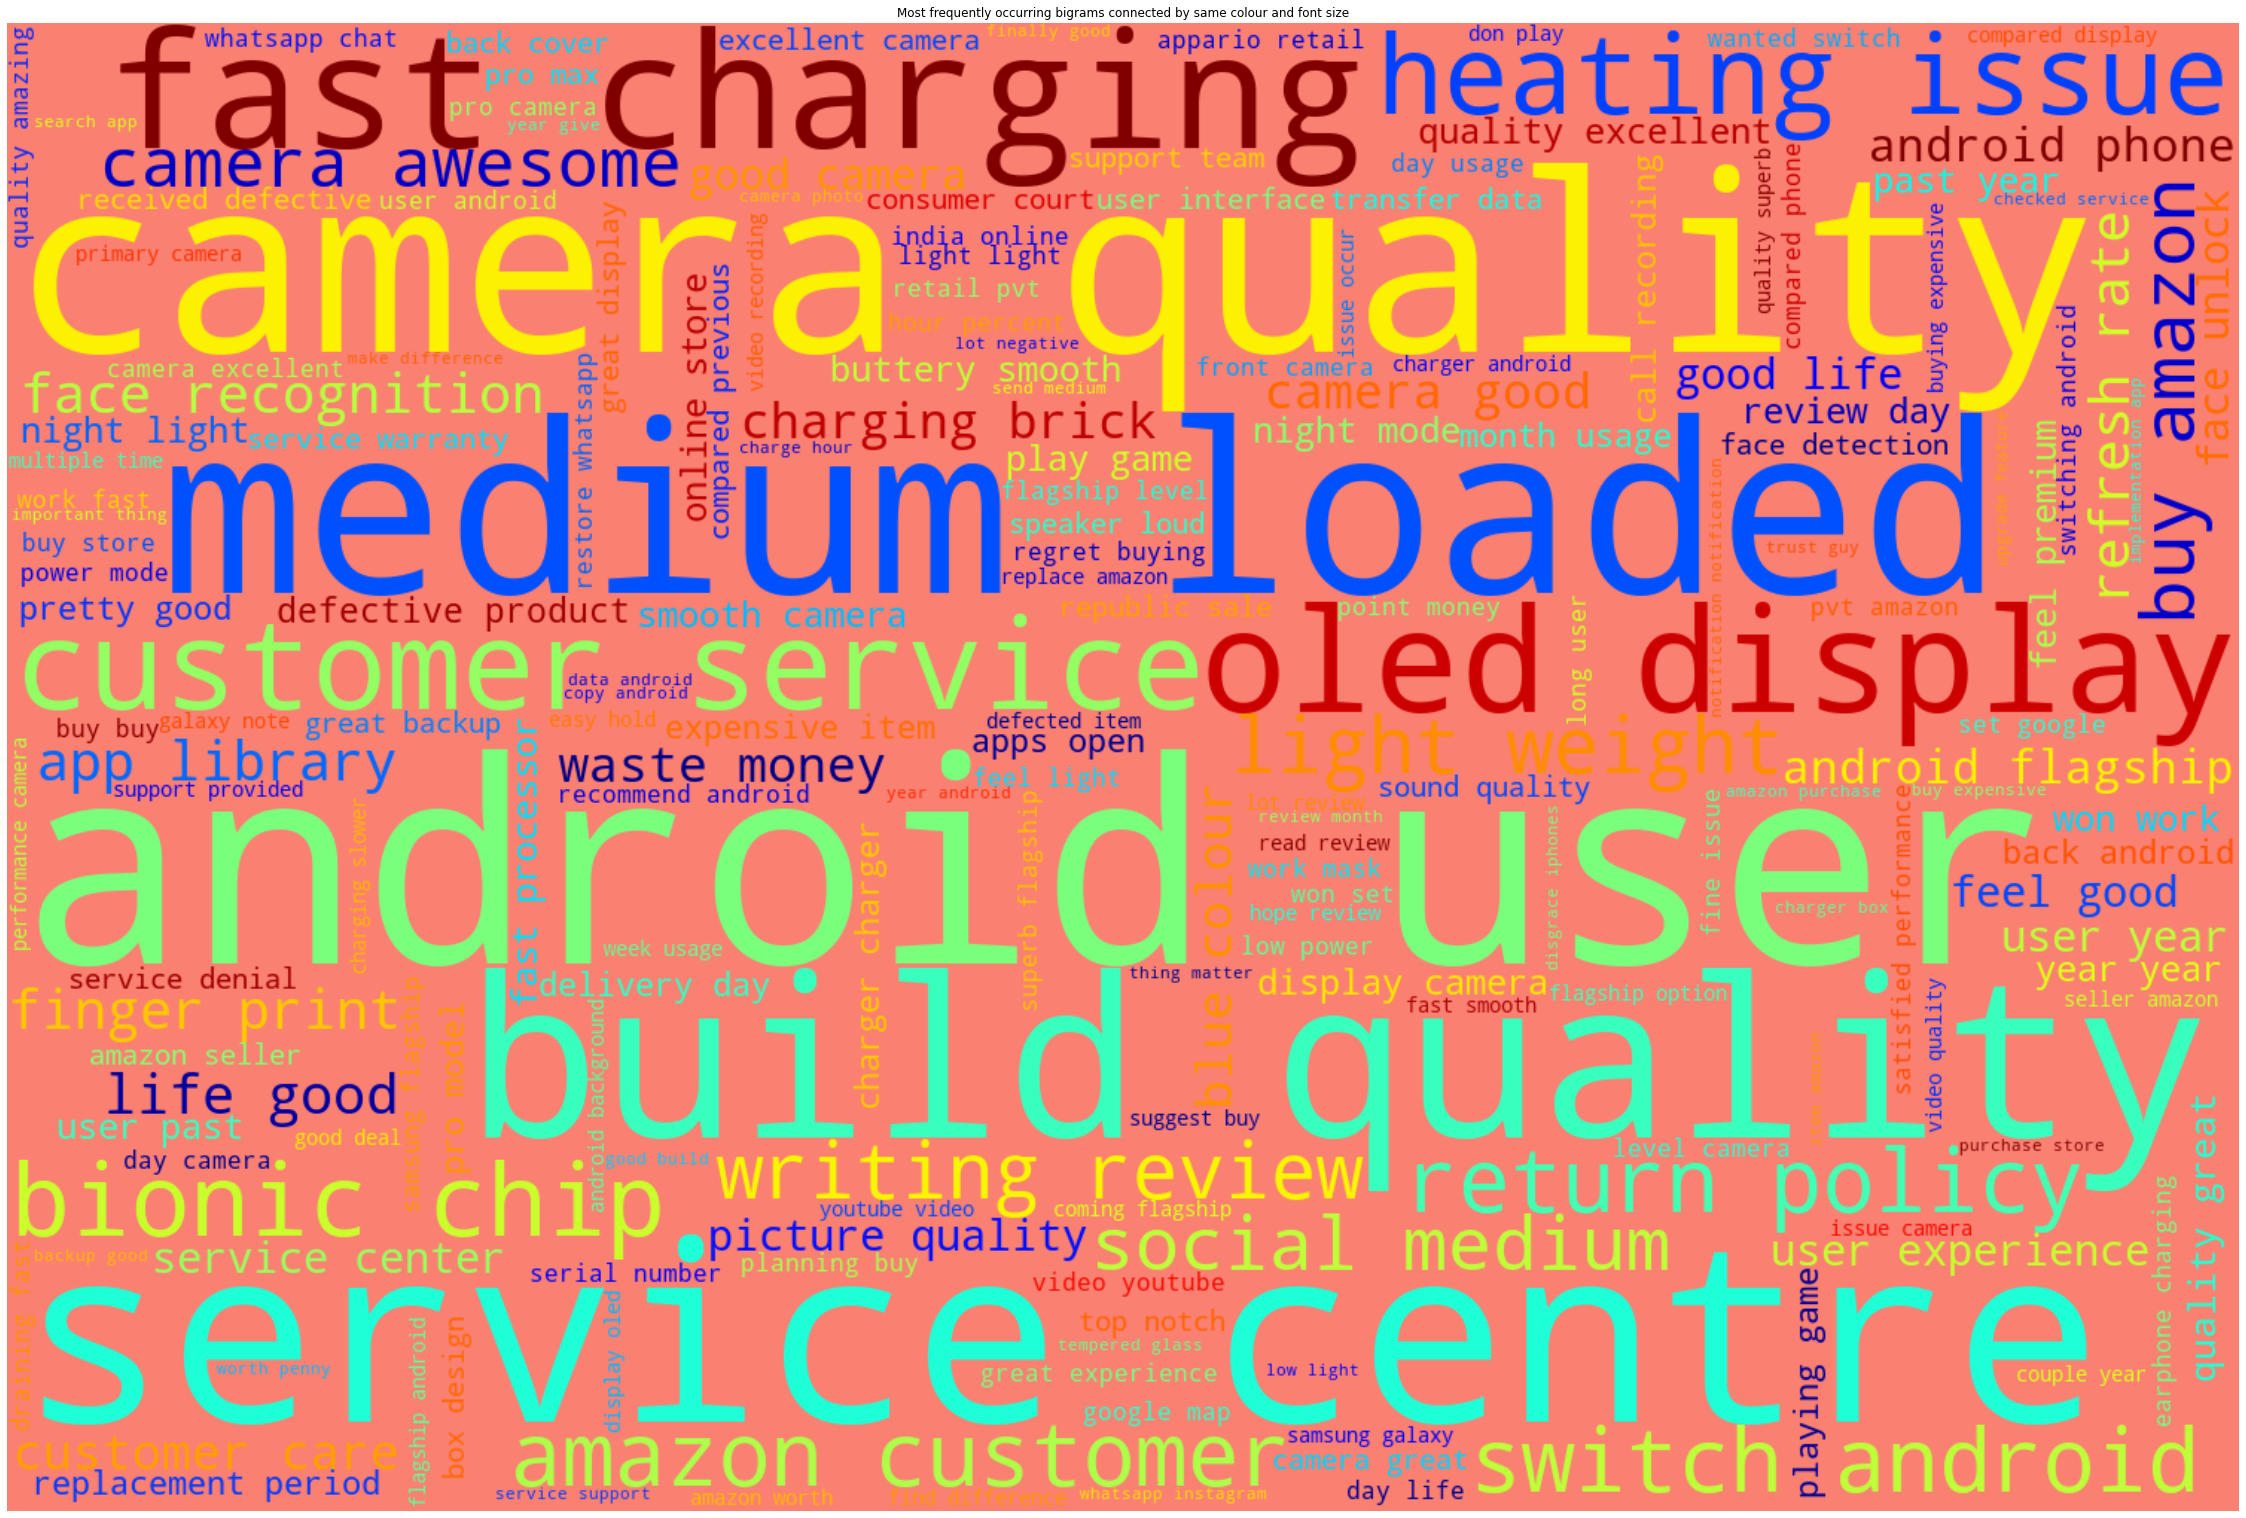

In [41]:
# Generating wordcloud
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,
                      stopwords=STOPWORDS, background_color='salmon', colormap='jet')
wordCloud.generate_from_frequencies(words_dict)

plt.figure(4, figsize=(40, 30))
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()